In [1]:

import tweepy
import csv
from datetime import datetime, timedelta
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

# Twitter API credentials
consumer_key = 'g8ojQRhcJC6s9bLc8ubMMxkY1'
consumer_secret = 'r0aYJ2W0bmLPP6mP4eP8uqShj22mXsHvtcSiwSwg1YIqoMnD5T'
access_token = '780453554-gGiOCQW2V2uZEaXcGpGUF57dyPPfi2m1y5ZnQb8N'
access_token_secret = 'VDnSnJmdTOwyO6186eAqkKeYmu76iaeixi2tRz0Iuzdmz'


# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

The selection of the eleven public personalities for Twitter user analysis was based on a diverse representation of influential individuals across various domains, encompassing politics, technology, sports, literature, and entertainment. Each chosen personality has a substantial global following, ensuring a wide-reaching and diverse audience.
The selected individuals are:

Rahul Gandhi (@RahulGandhi): A prominent political figure in Indian politics.

Elon Musk (@elonmusk): A visionary entrepreneur, CEO of Tesla and SpaceX, known for his innovations in technology and space exploration.

Cristiano Ronaldo (@cristiano): One of the world's greatest footballers with a massive global fan base.

Bill Gates (@BillGates): Co-founder of Microsoft and a leading philanthropist, focusing on global health and education.

Amitabh Bachchan (@SrBachchan): An iconic Bollywood actor and film industry legend.

Virat Kohli (@imVkohli): Captain of the Indian national cricket team, considered one of the best batsmen in the world.

Barack Obama (@BarackObama): Former President of the United States, known for his global impact on politics and diplomacy.

Emma Watson (@EmmaWatson): Renowned actress and UN Women Goodwill Ambassador, advocating for gender equality.

J.K. Rowling (@jk_rowling): Best-selling author of the Harry Potter series, known for her literary contributions.

Serena Williams (@serenawilliams): Tennis legend, winner of numerous Grand Slam titles and an influential figure in sports.

Narendra Modi (@narendramodi): Prime Minister of India, a key political figure on the global stage.

In [2]:
users = [
    "RahulGandhi",
    "elonmusk",
    "cristiano",
    "BillGates",
    "SrBachchan",
    "imVkohli",
    "BarackObama",
    "EmmaWatson",
    "jk_rowling",
    "serenawilliams",
    "narendramodi"
]

In [3]:
followers = []
for user in tqdm(users):
  user_followers = api.get_followers(screen_name = user, count = 100)
  user_followers = [i._json for i in user_followers]
  df = pd.DataFrame(user_followers)
  df['Parent'] = user
  followers.append(df)

  0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
users_tw = [api.get_user(screen_name = i)._json for i in users]
users_tw = pd.DataFrame(users_tw)
users_tw

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,3171712086,3171712086,Rahul Gandhi,RahulGandhi,,None,This is the official account of Rahul Gandhi |...,https://t.co/lY0TRLHAcX,{'url': {'urls': [{'url': 'https://t.co/lY0TRL...,False,...,333333,True,True,True,False,True,False,True,none,[]
1,44196397,44196397,Elon Musk,elonmusk,Trōllheim,None,(CTO) Chief Troll Officer,None,{'description': {'urls': []}},False,...,333333,True,True,False,False,True,False,True,none,[]
2,155659213,155659213,Cristiano Ronaldo,Cristiano,,None,This Privacy Policy addresses the collection a...,https://t.co/JlMkKHxKo1,{'url': {'urls': [{'url': 'https://t.co/JlMkKH...,False,...,0D0D0D,True,False,False,False,False,False,False,regular,[]
3,50393960,50393960,Bill Gates,BillGates,"Seattle, WA",None,Sharing things I'm learning through my foundat...,https://t.co/UkvHzxDwkH,{'url': {'urls': [{'url': 'https://t.co/UkvHzx...,False,...,333333,False,False,False,False,True,False,False,regular,[]
4,145125358,145125358,Amitabh Bachchan,SrBachchan,"Mumbai, India",None,"""तुमने हमें पूज पूज कर पत्थर कर डाला ; वे जो ह...",https://t.co/AdA1Uiv5ph,{'url': {'urls': [{'url': 'https://t.co/AdA1Ui...,False,...,000000,True,False,False,False,True,False,False,none,[]
5,71201743,71201743,Virat Kohli,imVkohli,,None,A proud husband and father ❤️,https://t.co/ec8skIzXFO,{'url': {'urls': [{'url': 'https://t.co/ec8skI...,False,...,333333,True,True,False,False,True,False,False,regular,[]
6,813286,813286,Barack Obama,BarackObama,"Washington, DC",None,"Dad, husband, President, citizen.",https://t.co/9EAGxkEB9p,{'url': {'urls': [{'url': 'https://t.co/9EAGxk...,False,...,333333,True,True,False,False,False,False,False,regular,[]
7,166739404,166739404,Emma Watson,EmmaWatson,,None,,https://t.co/bvMO5Qlo4Y,{'url': {'urls': [{'url': 'https://t.co/bvMO5Q...,False,...,666666,True,False,False,False,False,False,False,none,[]
8,62513246,62513246,J.K. Rowling,jk_rowling,Scotland,None,Writer sometimes known as Robert Galbraith,https://t.co/sQiPGyMaQ2,{'url': {'urls': [{'url': 'https://t.co/sQiPGy...,False,...,000000,True,True,False,False,True,False,False,regular,[]
9,26589987,26589987,Serena Williams,serenawilliams,Somewhere over the Rainbow,None,"Living, Loving, and working to help you.",https://t.co/dQQQA3ino7,{'url': {'urls': [{'url': 'https://t.co/dQQQA3...,False,...,3D1957,True,False,False,False,False,False,False,none,[]


In [5]:
users_tw.shape

(11, 45)

In [6]:
users_tw.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'status', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries'],
      dtype='object')

Basic Statistics of User Data:

       followers_count  friends_count   listed_count  favourites_count  \

count     1.100000e+01      11.000000      11.000000         11.000000   

mean      6.894324e+07   50312.090909   66705.181818       7948.454545   

std       5.223445e+07  164261.747992   67257.221737      16909.928157   

min       1.047239e+07      61.000000    5539.000000          0.000000   

25%       2.613101e+07     321.000000   25466.500000         50.500000   

50%       6.059700e+07     523.000000   31647.000000        493.000000   

75%       1.027225e+08    1475.000000  102920.000000        899.000000   

max       1.704972e+08  545574.000000  214364.000000      43386.000000   



       statuses_count  

count        11.00000  

mean      19647.00000  

std       21406.68732  

min        1845.00000  

25%        4224.00000  

50%       14729.00000  

75%       26905.00000  

max       70736.00000  


<ipython-input-7-91a124e76b9d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator

  axes[0, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')

<ipython-input-7-91a124e76b9d>:32: UserWarning: FixedFormatter should only be used together with FixedLocator

  axes[0, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')

<ipython-input-7-91a124e76b9d>:37: UserWarning: FixedFormatter should only be used together with FixedLocator

  axes[1, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')

<ipython-input-7-91a124e76b9d>:42: UserWarning: FixedFormatter should only be used together with FixedLocator

  axes[1, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')

<ipython-input-7-91a124e76b9d>:47: UserWarning: FixedFormatter should only be used together with FixedLocator

  axes[2, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')


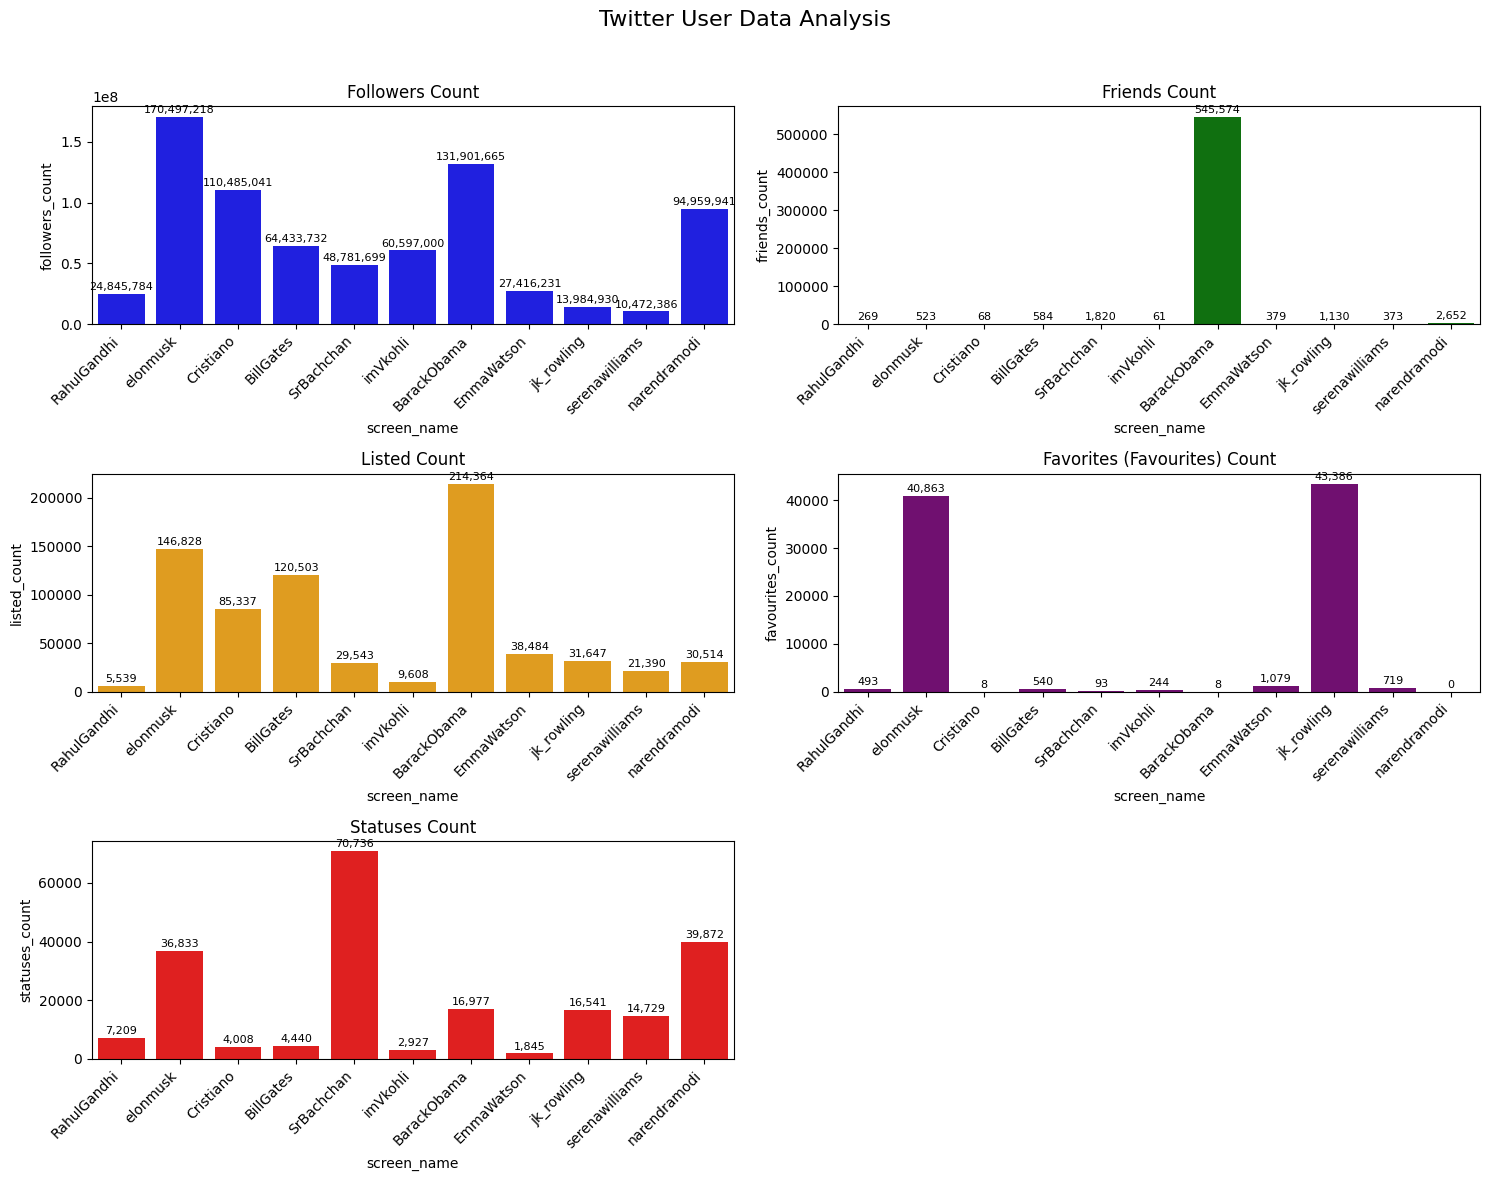

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming users_tw is your DataFrame
# Replace 'your_column_names' with the actual column names you have in your DataFrame
user_data = users_tw[['screen_name', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count']]

# Display basic statistics of the user data
print("Basic Statistics of User Data:")
print(user_data.describe())

# Plotting various user data with labels and numbers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Twitter User Data Analysis', fontsize=16)

# Helper function to annotate bars with values
def annotate_bars(ax, data):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Bar plots with labels and numbers
sns.barplot(ax=axes[0, 0], x='screen_name', y='followers_count', data=user_data, color='blue')
axes[0, 0].set_title('Followers Count')
axes[0, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[0, 0], user_data['followers_count'])

sns.barplot(ax=axes[0, 1], x='screen_name', y='friends_count', data=user_data, color='green')
axes[0, 1].set_title('Friends Count')
axes[0, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[0, 1], user_data['friends_count'])

sns.barplot(ax=axes[1, 0], x='screen_name', y='listed_count', data=user_data, color='orange')
axes[1, 0].set_title('Listed Count')
axes[1, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[1, 0], user_data['listed_count'])

sns.barplot(ax=axes[1, 1], x='screen_name', y='favourites_count', data=user_data, color='purple')
axes[1, 1].set_title('Favorites (Favourites) Count')
axes[1, 1].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[1, 1], user_data['favourites_count'])

sns.barplot(ax=axes[2, 0], x='screen_name', y='statuses_count', data=user_data, color='red')
axes[2, 0].set_title('Statuses Count')
axes[2, 0].set_xticklabels(user_data['screen_name'], rotation=45, ha='right')
annotate_bars(axes[2, 0], user_data['statuses_count'])

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


followers_count	=
The number of followers this account currently has.

friends_count	=
The number of users this account is following (AKA their “followings”).

listed_count =
The number of public lists that this user is a member of.

favourites_count =
The number of Tweets this user has liked in the account’s lifetime.

statuses_count	=
The number of Tweets (including retweets) issued by the user.

In [8]:
user_data = pd.concat(followers)

In [9]:
full_data = pd.concat([user_data,users_tw]).reset_index(drop = True)
full_data

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,notifications,muting,blocking,blocked_by,translator_type,withheld_in_countries,status,profile_banner_url,Parent,profile_location
0,1751909297552809984,1751909297552809984,ajeet maurya,ajeet_maur33803,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
1,1751910811516510208,1751910811516510208,Intezar971,intezar971,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
2,1751910865589194752,1751910865589194752,Neeraj kumar Neeraj kumar,neeraj_kum98192,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
3,1751910503129948160,1751910503129948160,SUMIT YADAV,SUMITYA40976114,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
4,1751910420682838016,1751910420682838016,Parmar Jignesh,ParmarJigs1990,,,None,{'description': {'urls': []}},False,0,...,False,False,False,False,none,[],NaN,NaN,RahulGandhi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,813286,813286,Barack Obama,BarackObama,"Washington, DC","Dad, husband, President, citizen.",https://t.co/9EAGxkEB9p,{'url': {'urls': [{'url': 'https://t.co/9EAGxk...,False,131901665,...,False,NaN,NaN,NaN,regular,[],{'created_at': 'Sat Jan 27 00:13:42 +0000 2024...,https://pbs.twimg.com/profile_banners/813286/1...,NaN,None
1107,166739404,166739404,Emma Watson,EmmaWatson,,,https://t.co/bvMO5Qlo4Y,{'url': {'urls': [{'url': 'https://t.co/bvMO5Q...,False,27416231,...,False,NaN,NaN,NaN,none,[],{'created_at': 'Fri May 05 09:13:24 +0000 2023...,https://pbs.twimg.com/profile_banners/16673940...,NaN,None
1108,62513246,62513246,J.K. Rowling,jk_rowling,Scotland,Writer sometimes known as Robert Galbraith,https://t.co/sQiPGyMaQ2,{'url': {'urls': [{'url': 'https://t.co/sQiPGy...,False,13984930,...,False,NaN,NaN,NaN,regular,[],{'created_at': 'Sun Jan 28 15:09:58 +0000 2024...,https://pbs.twimg.com/profile_banners/62513246...,NaN,None
1109,26589987,26589987,Serena Williams,serenawilliams,Somewhere over the Rainbow,"Living, Loving, and working to help you.",https://t.co/dQQQA3ino7,{'url': {'urls': [{'url': 'https://t.co/dQQQA3...,False,10472386,...,False,NaN,NaN,NaN,none,[],{'created_at': 'Tue Jan 02 00:21:54 +0000 2024...,https://pbs.twimg.com/profile_banners/26589987...,NaN,None


In [10]:
full_data.to_csv('user_data.csv', index = False)

In [11]:
full_data.shape

(1111, 50)

In [12]:
full_data.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'live_following', 'follow_request_sent', 'notifications',
       'muting', 'blocking', 'blocked_by', 'translator_type',
       'withheld_in_countries', 'status', 'profile_banner_url', 'Parent',

In [13]:
!pip install textblob networkx matplotlib seaborn

In [14]:
!pip install tweepy networkx plotly

In [18]:
def get_timeline(user):
  try:
    timeline = []
    start_date = datetime.now() - timedelta(days=365)
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=user, since_id=start_date).items():
      timeline.append(tweet._json)
  except:
    timeline = []
  return timeline

In [ ]:
timelines = []
for i in tqdm(full_data['screen_name'].drop_duplicates().tolist()):
  timelines.append(get_timeline(i))

  0%|          | 0/1058 [00:00<?, ?it/s]

In [17]:
import json
json.dump(timelines, open('timelines.json','w'))

NameError: name 'timelines' is not defined

In [32]:
!zip "timelines.zip" timelines.json

	zip warning: name not matched: timelines.json



zip error: Nothing to do! (timelines.zip)


In [16]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# with open(timelines_file, 'r', encoding='utf-8', errors='replace') as file:
#     timelines = json.load(file)

# # Flatten the list of timelines
# tweets_data = [tweet for timeline in timelines for tweet in timeline]

# # Load the timelines data from the JSON file
# timelines_file = '/content/drive/MyDrive/timelines.zip'  # Replace with the actual file path
# with open(timelines_file, 'r') as file:
#     timelines = json.load(file)


In [19]:

import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/timelines.zip'  # Replace with the actual file path

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one file in the ZIP archive, extract it
    zip_ref.extractall('/content/extracted_folder')

# Now, load the JSON file from the extracted folder
json_file_path = '/content/extracted_folder/timelines.json'  # Replace with the actual file path
with open(json_file_path, 'r', encoding='utf-8', errors='replace') as file:
    timelines = json.load(file)

# Flatten the list of timelines
tweets_data = [tweet for timeline in timelines for tweet in timeline]

# Create a DataFrame from the tweets data
tweets_df = pd.DataFrame(tweets_data)

# Display basic information about the DataFrame
print("Shape of Tweets DataFrame:", tweets_df.shape)
print("\nColumns in Tweets DataFrame:", tweets_df.columns)

# Display basic statistics of the user data
print("\nBasic Statistics of Tweets DataFrame:")
print(tweets_df.describe())


Shape of Tweets DataFrame: (188837, 30)



Columns in Tweets DataFrame: Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',

       'in_reply_to_status_id', 'in_reply_to_status_id_str',

       'in_reply_to_user_id', 'in_reply_to_user_id_str',

       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',

       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',

       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',

       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',

       'quoted_status', 'withheld_in_countries'],

      dtype='object')



Basic Statistics of Tweets DataFrame:

                 id  in_reply_to_status_id  in_reply_to_user_id  \

count  1.888370e+05           6.742000e+04         6.945900e+04   

mean   1.453765e+18           1.559473e+18         6.167214e+17   

std    4.137387e+17           3.311827e+17         6.784713e+17   

min    1.799458e+08           2

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.


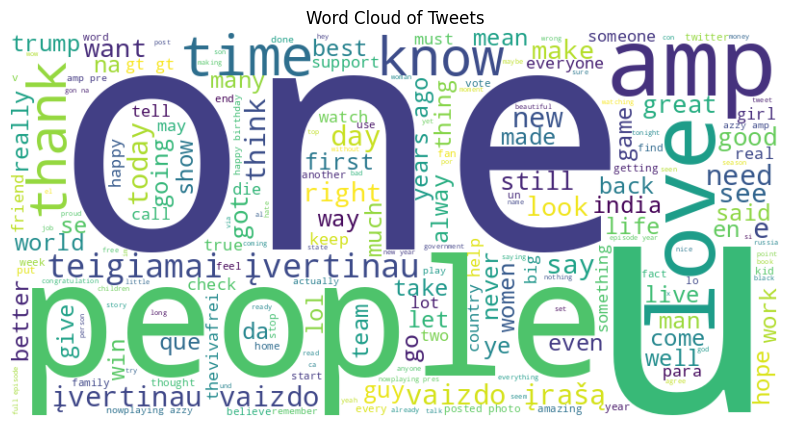

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

# Word Cloud
def generate_wordcloud(text):
    # Add custom stop words to the default set
    custom_stop_words = set(stopwords.words('english') + ['https', 'rt', 'youtube', 'de', 'la', 'etc'])

    word_tokens = word_tokenize(text)

    # Filter out stop words
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in custom_stop_words]

    return " ".join(filtered_words)

# Combine all tweets into a single string
all_tweets_text = " ".join(tweets_df['text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(generate_wordcloud(all_tweets_text))

# Plot the Word Cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


In [25]:
!pip install transformers

In [28]:
tweets_df.to_csv('tweets_df.csv', index = False)

In [29]:
!zip 'tweetscsv.zip' tweets_df.csv

  adding: tweets_df.csv (deflated 92%)


In [1]:
import pandas as pd
tweets_df = pd.read_csv('/kaggle/input/tweetscsvproject/tweets_df.csv')

/tmp/ipykernel_26/2791642698.py:2: DtypeWarning: Columns (1,2,4,9,13,14,18,19,20,21,22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv('/kaggle/input/tweetscsvproject/tweets_df.csv')


In [2]:
from transformers import pipeline
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device = 0)
# sentiment_task(["Covid cases are increasing fast!",'good'])


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [49]:
tweets_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'withheld_in_countries', 'sentiment'],
      dtype='object')

In [41]:
import torch
#texts = tweets_df['text'].fillna('').astype('str').tolist()
texts = tweets_df.sample(10000)['text'].fillna('').astype('str').tolist()
sentiments = []
from tqdm.auto import tqdm
for i in tqdm(range(0,10000,400)):
    temp_text = texts[i:i+400]
    temp_sent = sentiment_task(temp_text, batch_size = 400)
    torch.cuda.empty_cache()
    sentiments.extend(temp_sent)
# sentiments = sentiment_task(texts.tolist(), batch_size = 256)

  0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [42]:
s_df = pd.DataFrame(sentiments)
s_df['text'] = texts

<Axes: xlabel='label'>

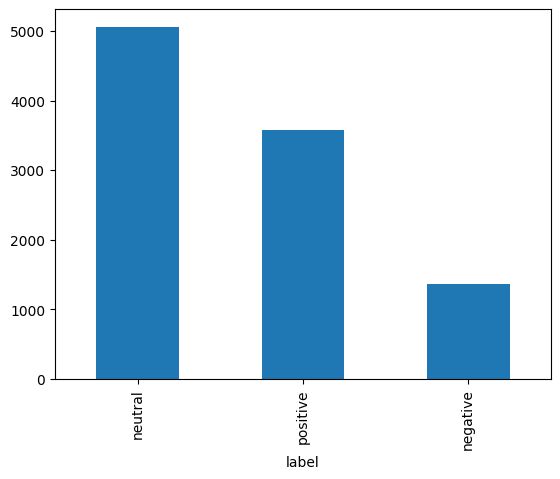

In [43]:
pd.DataFrame(sentiments)['label'].value_counts().plot(kind = 'bar')

In [44]:
import torch
torch.cuda.empty_cache()

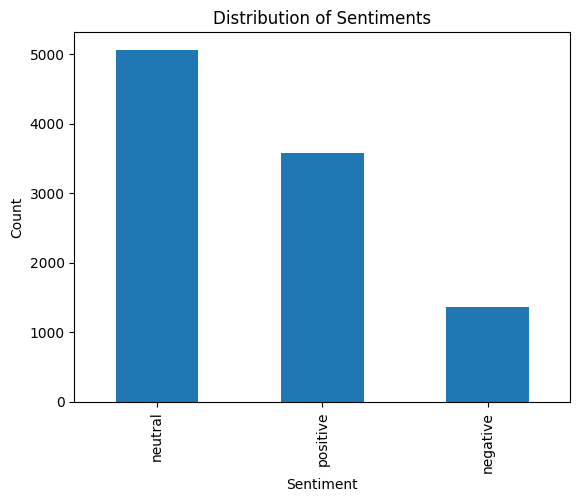

Percentage of Positive Tweets: 35.71%
Percentage of Negative Tweets: 13.68%
Percentage of Neutral Tweets: 50.61%


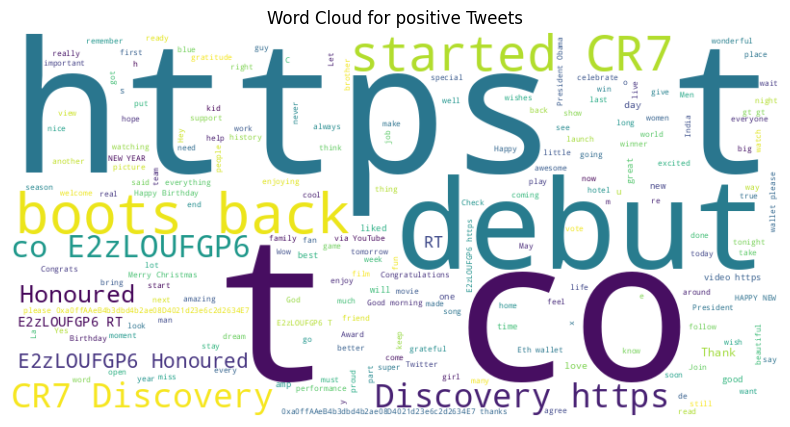

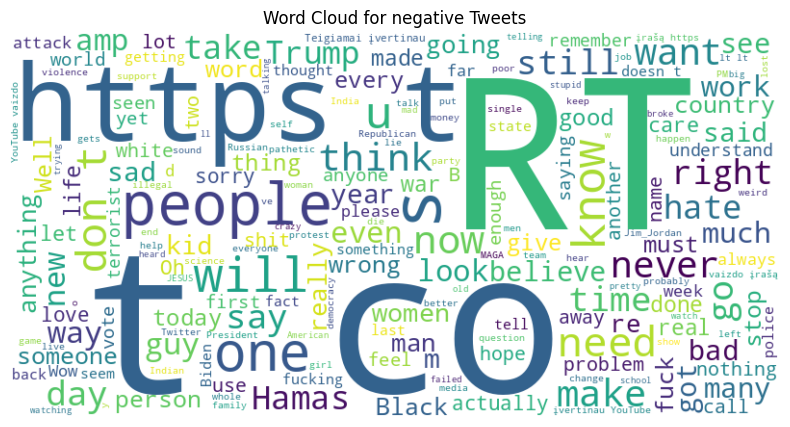

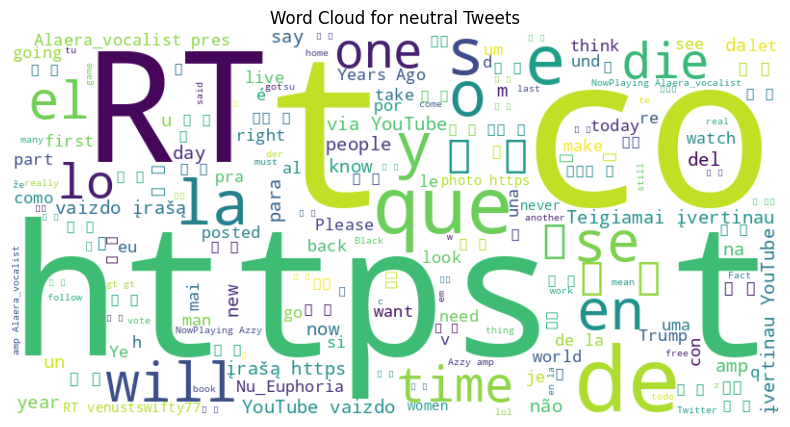

In [46]:
import pandas as pd
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# # Load DataFrame and sentiment analysis model
# tweets_df = pd.read_csv('/kaggle/input/tweetscsvproject/tweets_df.csv')
# model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)

# # Perform sentiment analysis
# texts = tweets_df['text'].fillna('').astype('str').tolist()
# sentiments = []

# # Perform sentiment analysis in batches
# batch_size = 400
# for i in range(0, len(texts), batch_size):
#     temp_text = texts[i:i + batch_size]
#     temp_sent = sentiment_task(temp_text, batch_size=batch_size)
#     sentiments.extend(temp_sent)

# # Create DataFrame from sentiment results
sentiments_df = s_df

# Plot the distribution of sentiments
sentiments_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Calculate percentage of each sentiment
sentiment_counts = sentiments_df['label'].value_counts()
total_tweets = len(sentiments_df)
percentage_positive = (sentiment_counts['positive'] / total_tweets) * 100
percentage_negative = (sentiment_counts['negative'] / total_tweets) * 100
percentage_neutral = (sentiment_counts['neutral'] / total_tweets) * 100

print(f"Percentage of Positive Tweets: {percentage_positive:.2f}%")
print(f"Percentage of Negative Tweets: {percentage_negative:.2f}%")
print(f"Percentage of Neutral Tweets: {percentage_neutral:.2f}%")

# Generate word clouds for each sentiment category
for sentiment_label in ['positive', 'negative', 'neutral']:
#     sentiment_indices = sentiments_df['label'] == sentiment_label

    # Merge sentiments_df with tweets_df to get the corresponding tweets
#     sentiment_tweets_df = pd.merge(tweets_df, sentiments_df[sentiment_indices], left_index=True, right_index=True)

    # Extract tweets for the specific sentiment
    sentiment_tweets = sentiments_df[sentiments_df['label']==sentiment_label]['text'].fillna('').astype('str')
    sentiment_text = " ".join(sentiment_tweets)

    # Check if there are words for the sentiment
    if sentiment_text:
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)

        # Plot the Word Cloud image
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label} Tweets')
        plt.show()
    else:
        print(f"No words available for {sentiment_label} sentiment.")


In [38]:
sentiments_df.columns

Index(['label', 'score'], dtype='object')

In [39]:
print(sentiments_df.columns)

Index(['label', 'score'], dtype='object')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
338517


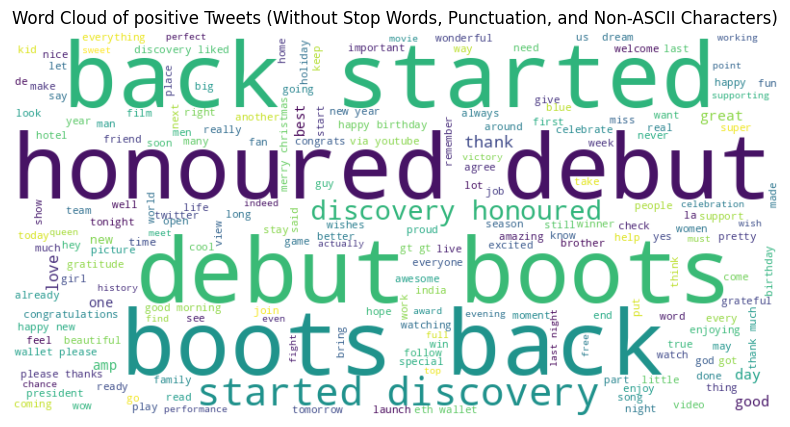

143303


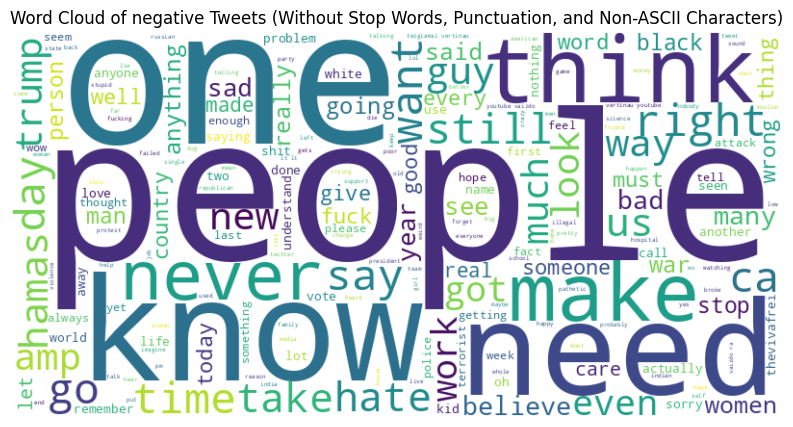

466077


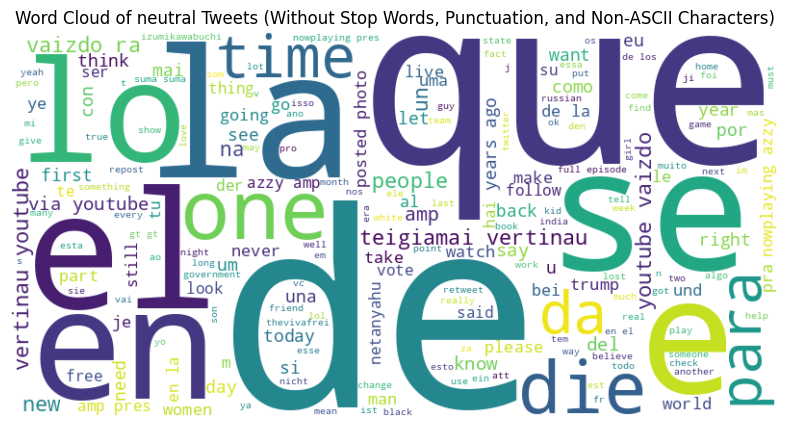

In [52]:
import string
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

def generate_wordcloud_new(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)

    # Remove stop words, non-alphabetic words, and words with only one character
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words and len(word) > 1]

    # Remove words that start with 'http' or 'www'
    filtered_words = [word for word in filtered_words if not word.startswith(('http', 'www', 'rt'))]

    # Remove punctuation using ASCII characters
    filtered_words = [word.translate(str.maketrans('', '', string.punctuation)) for word in filtered_words]

    # Keep only ASCII characters
    filtered_words = [word.encode('ascii', 'ignore').decode() for word in filtered_words]

    return " ".join(filtered_words)

# Replace 'label' with the actual column name containing sentiment labels in your DataFrame
sentiment_column_name = 'label'
score_column_name = 'score'

# Filter tweets based on sentiment confidence (you can adjust this threshold)
confidence_threshold = 0.7
positive_tweets = sentiments_df[(sentiments_df[sentiment_column_name] == 'positive') & (sentiments_df[score_column_name] >= confidence_threshold)]
negative_tweets = sentiments_df[(sentiments_df[sentiment_column_name] == 'negative') & (sentiments_df[score_column_name] >= confidence_threshold)]
neutral_tweets = sentiments_df[(sentiments_df[sentiment_column_name] == 'neutral') & (sentiments_df[score_column_name] >= confidence_threshold)]

# Generate word clouds for each sentiment
for sentiment_label, tweets in [('positive', positive_tweets), ('negative', negative_tweets), ('neutral', neutral_tweets)]:
#     all_tweets_text = " ".join(sentiment_tweets_df['text'].fillna('').astype('str'))
    sentiment_tweets = sentiments_df[sentiments_df['label']==sentiment_label]['text'].fillna('').astype('str')
    all_tweets_text = " ".join(sentiment_tweets)
    print(len(all_tweets_text))
    # Generate word cloud with preprocessing
    filtered_words = generate_wordcloud_new(all_tweets_text)
    
    if filtered_words:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

        # Plot the Word Cloud image
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of {sentiment_label} Tweets (Without Stop Words, Punctuation, and Non-ASCII Characters)')
        plt.show()
    else:
        print(f"No words found for {sentiment_label} sentiment.")
